# 베스트셀러 EDA
2025년 월별 카테고리 분포 및 순위 변동 분석

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from supabase import create_client

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

load_dotenv()
supabase = create_client(os.getenv('SUPABASE_URL'), os.getenv('SUPABASE_KEY'))

## 1. 데이터 로드

In [3]:
# bestsellers 테이블 (월별 순위 정보)
bestsellers_res = supabase.table('bestsellers').select('*').execute()
df_bestsellers = pd.DataFrame(bestsellers_res.data)

# books 테이블 (도서 정보 + 카테고리)
books_res = supabase.table('books').select('product_code, title, category_1, category_2, category_3').execute()
df_books = pd.DataFrame(books_res.data)

print(f"베스트셀러 레코드: {len(df_bestsellers)}")
print(f"도서 레코드: {len(df_books)}")

베스트셀러 레코드: 240
도서 레코드: 105


In [4]:
# 데이터 병합
df = df_bestsellers.merge(df_books, on='product_code', how='left')
df['bestseller_month'] = pd.to_datetime(df['bestseller_month'])
df['month'] = df['bestseller_month'].dt.strftime('%Y-%m')

print(f"병합 후 레코드: {len(df)}")
df.head()

병합 후 레코드: 240


,id,bestseller_month,rank,product_code,rating,review_count,created_at,title,category_1,category_2,category_3,month
0,799,2025-01-01,1,S000215067855,9.2,272,2026-01-11T12:23:04.68642+00:00,왜 그들만 부자가 되는가,금융시스템/위기,부동산/실물자산,None,2025-01
1,800,2025-01-01,2,S000214208202,9.7,607,2026-01-11T12:23:04.68642+00:00,트렌드 코리아 2025,None,None,None,2025-01
2,801,2025-01-01,3,S000214710919,9.9,415,2026-01-11T12:23:04.68642+00:00,트럼프 2.0 시대,거시경제/금융정책,지정학/국제정세,부동산/실물자산,2025-01
3,802,2025-01-01,4,S000001947552,9.7,1586,2026-01-11T12:23:04.68642+00:00,돈의 심리학(30만 부 기념 스페셜 에디션),None,None,None,2025-01
4,803,2025-01-01,5,S000215014915,9.8,192,2026-01-11T12:23:04.68642+00:00,세스 고딘의 전략 수업(This is Strategy Seth Godin),지정학/국제정세,None,None,2025-01


## 2. 기본 통계

In [5]:
# 월별 도서 수
print("월별 베스트셀러 도서 수:")
print(df.groupby('month').size())

월별 베스트셀러 도서 수:
month
2025-01    20
2025-02    20
2025-03    20
2025-04    20
2025-05    20
2025-06    20
2025-07    20
2025-08    20
2025-09    20
2025-10    20
2025-11    20
2025-12    20
dtype: int64


In [6]:
# 카테고리별 도서 수
print("\n카테고리별 도서 수 (category_1 기준):")
print(df['category_1'].value_counts())


카테고리별 도서 수 (category_1 기준):
category_1
주식투자/트레이딩    60
재테크/개인금융     29
거시경제/금융정책    19
경제이론/학술      17
기업경영/리더십     17
투자철학/대가      15
테크/스타트업      14
금융시스템/위기     13
부동산/실물자산     13
지정학/국제정세     10
Name: count, dtype: int64


In [7]:
# 카테고리 미분류 비율
null_cat = df['category_1'].isna().sum()
print(f"\n카테고리 미분류: {null_cat}건 ({null_cat/len(df)*100:.1f}%)")


카테고리 미분류: 33건 (13.8%)


## 3. 월별 카테고리 분포

In [8]:
# 월별 카테고리 집계
monthly_cat = df.groupby(['month', 'category_1']).size().unstack(fill_value=0)
monthly_cat

category_1,거시경제/금융정책,경제이론/학술,금융시스템/위기,기업경영/리더십,부동산/실물자산,재테크/개인금융,주식투자/트레이딩,지정학/국제정세,테크/스타트업,투자철학/대가
month,,,,,,,,,,
2025-01,2,1,1,1,2,2,4,2,1,1
2025-02,3,1,1,0,3,3,3,2,1,1
2025-03,1,2,1,1,3,2,4,1,2,1
2025-04,0,2,1,2,3,2,4,0,2,0
2025-05,0,2,1,4,2,3,4,1,1,1
2025-06,3,2,2,1,0,3,5,0,2,1
2025-07,2,2,2,1,0,3,5,1,2,1
2025-08,2,2,0,2,0,2,6,1,0,3
2025-09,1,0,1,3,0,2,7,0,1,2


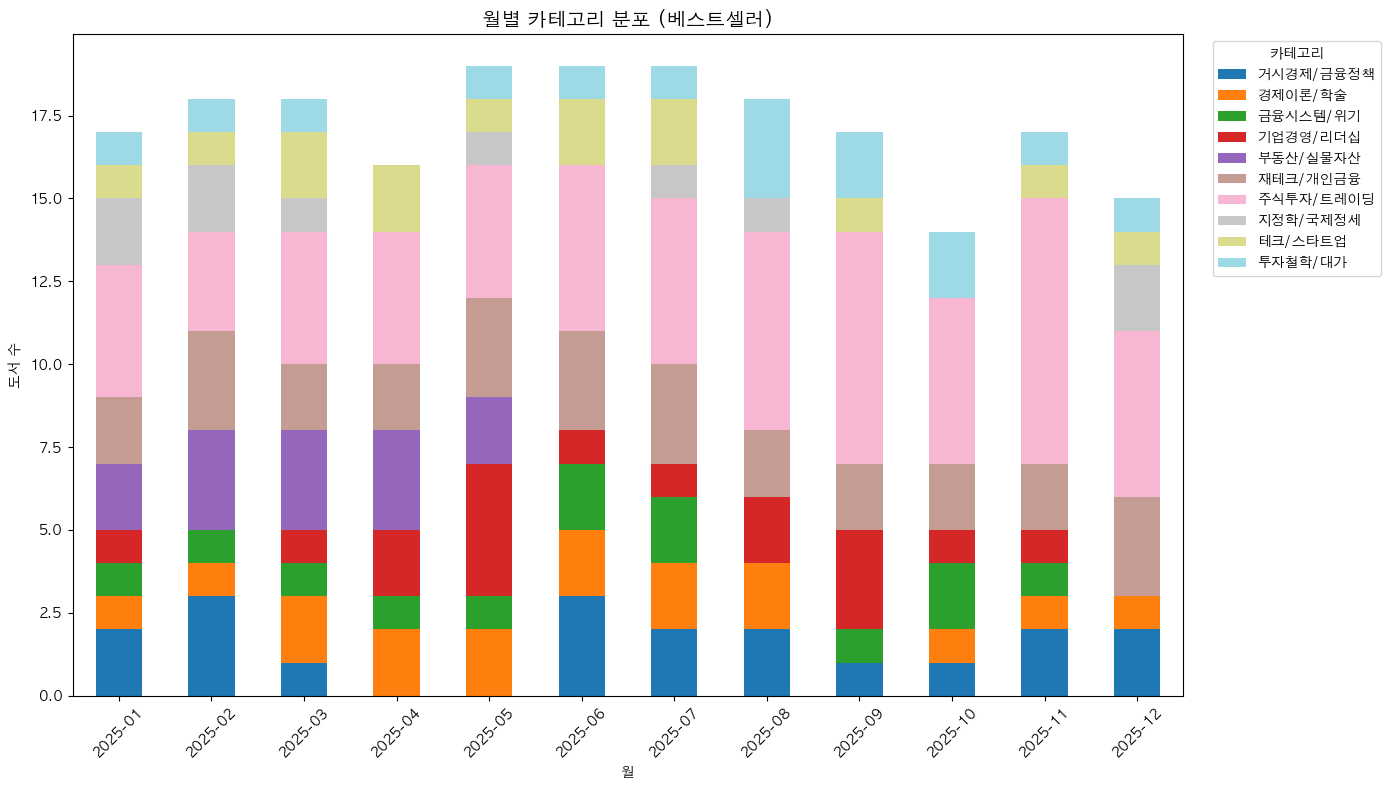

In [9]:
# 월별 카테고리 분포 - Stacked Bar Chart
fig, ax = plt.subplots(figsize=(14, 8))
monthly_cat.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
ax.set_title('월별 카테고리 분포 (베스트셀러)', fontsize=14)
ax.set_xlabel('월')
ax.set_ylabel('도서 수')
ax.legend(title='카테고리', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

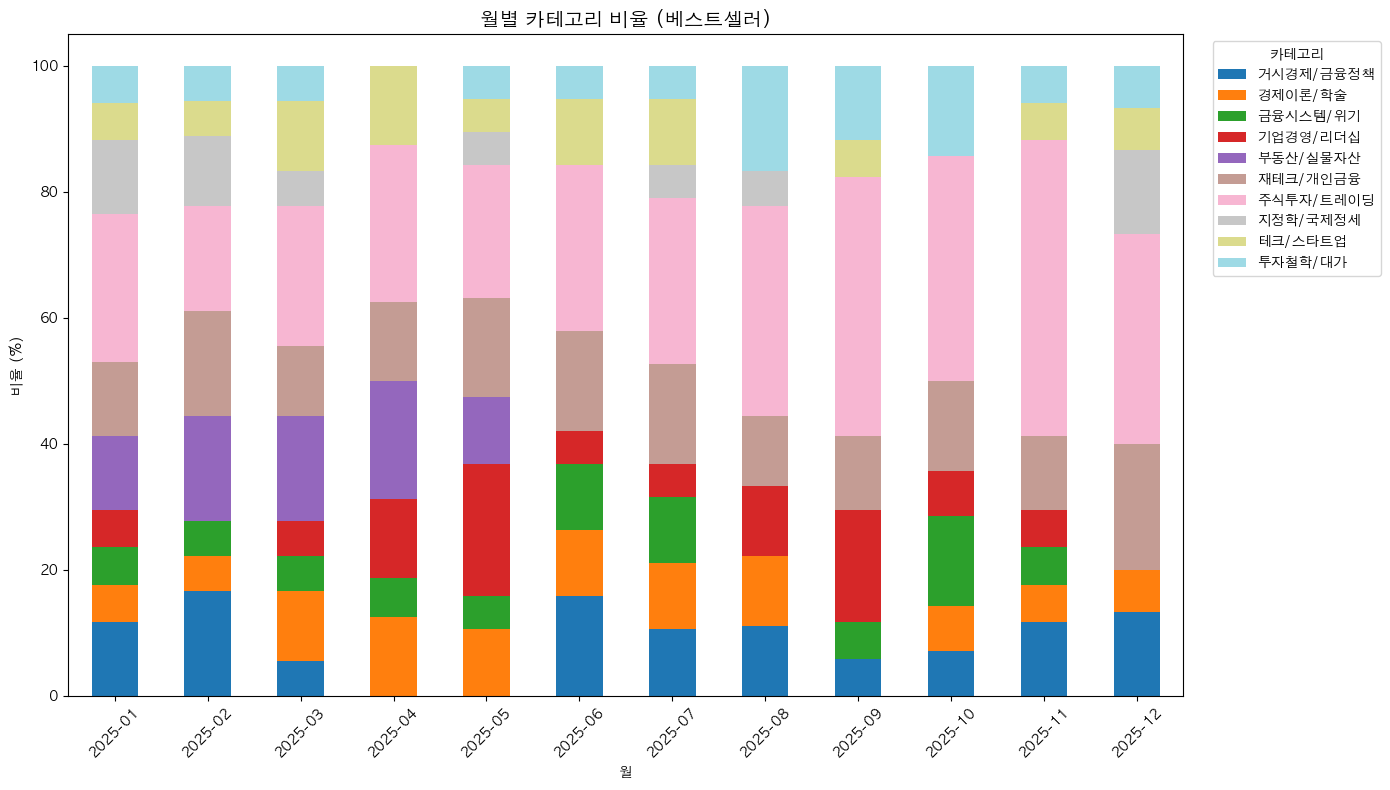

In [10]:
# 월별 카테고리 비율 - 100% Stacked
monthly_cat_pct = monthly_cat.div(monthly_cat.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(14, 8))
monthly_cat_pct.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
ax.set_title('월별 카테고리 비율 (베스트셀러)', fontsize=14)
ax.set_xlabel('월')
ax.set_ylabel('비율 (%)')
ax.legend(title='카테고리', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. 카테고리별 순위 변동 추이

In [11]:
# 카테고리별 월평균 순위
cat_rank = df.groupby(['month', 'category_1'])['rank'].mean().unstack()
cat_rank

category_1,거시경제/금융정책,경제이론/학술,금융시스템/위기,기업경영/리더십,부동산/실물자산,재테크/개인금융,주식투자/트레이딩,지정학/국제정세,테크/스타트업,투자철학/대가
month,,,,,,,,,,
2025-01,7.000000,7.0,1.0,13.000000,15.000000,10.500000,14.000000,7.5,19.0,8.000000
2025-02,10.333333,9.0,1.0,NaN,15.666667,13.333333,8.000000,9.0,16.0,10.000000
2025-03,2.000000,9.5,6.0,19.000000,11.000000,13.500000,7.000000,7.0,13.5,18.000000
2025-04,NaN,14.0,20.0,11.500000,9.666667,15.000000,6.500000,NaN,8.5,NaN
2025-05,NaN,15.0,12.0,15.000000,8.500000,11.333333,8.250000,2.0,10.0,4.000000
2025-06,6.333333,14.0,9.5,8.000000,NaN,12.666667,14.000000,NaN,10.5,1.000000
2025-07,5.500000,15.5,16.5,10.000000,NaN,7.333333,12.000000,3.0,14.5,4.000000
2025-08,14.000000,19.5,NaN,16.500000,NaN,8.500000,8.833333,6.0,NaN,7.666667
2025-09,1.000000,NaN,5.0,15.666667,NaN,11.500000,11.571429,NaN,8.0,6.500000


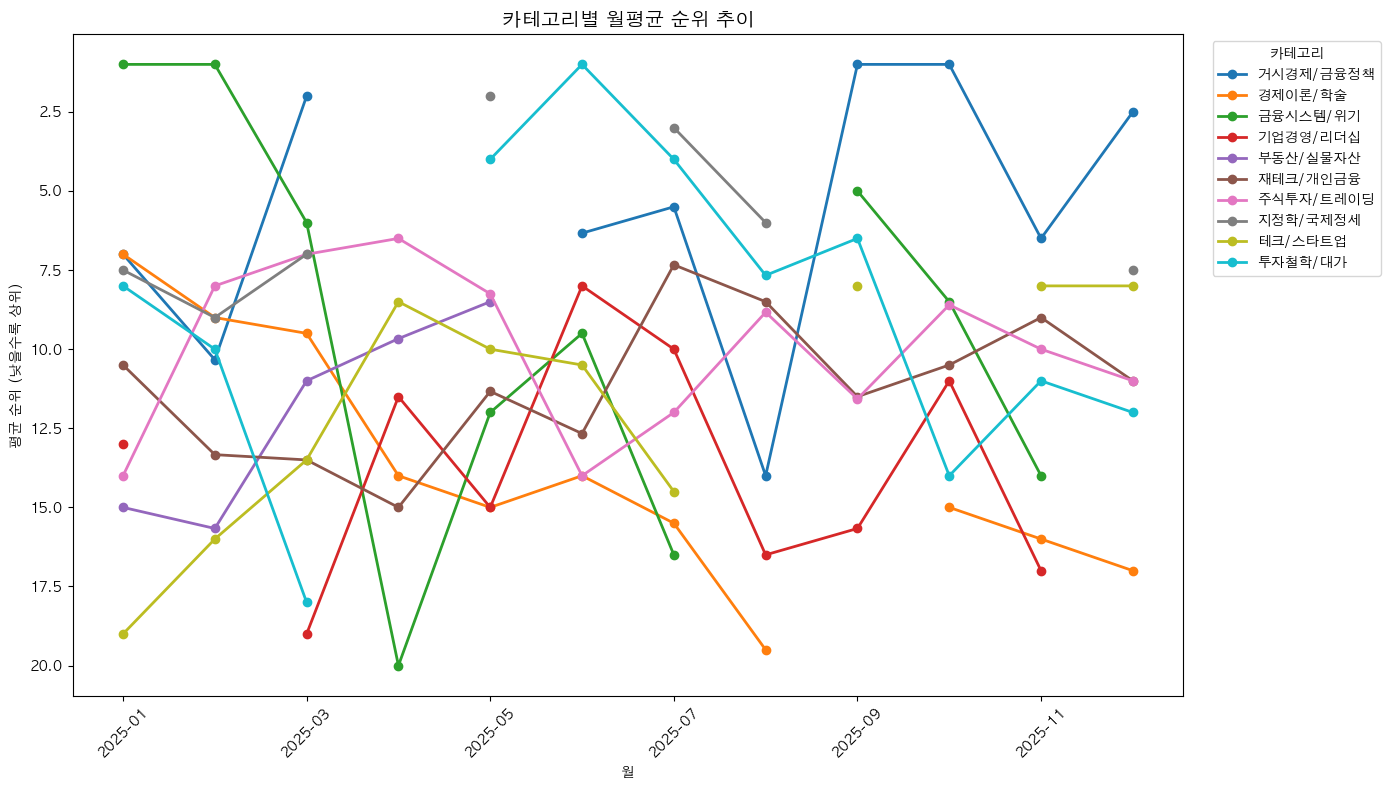

In [12]:
# 카테고리별 평균 순위 추이 (낮을수록 좋음)
fig, ax = plt.subplots(figsize=(14, 8))
cat_rank.plot(ax=ax, marker='o', linewidth=2)
ax.set_title('카테고리별 월평균 순위 추이', fontsize=14)
ax.set_xlabel('월')
ax.set_ylabel('평균 순위 (낮을수록 상위)')
ax.legend(title='카테고리', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.invert_yaxis()  # 순위는 낮을수록 좋으므로 y축 반전
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

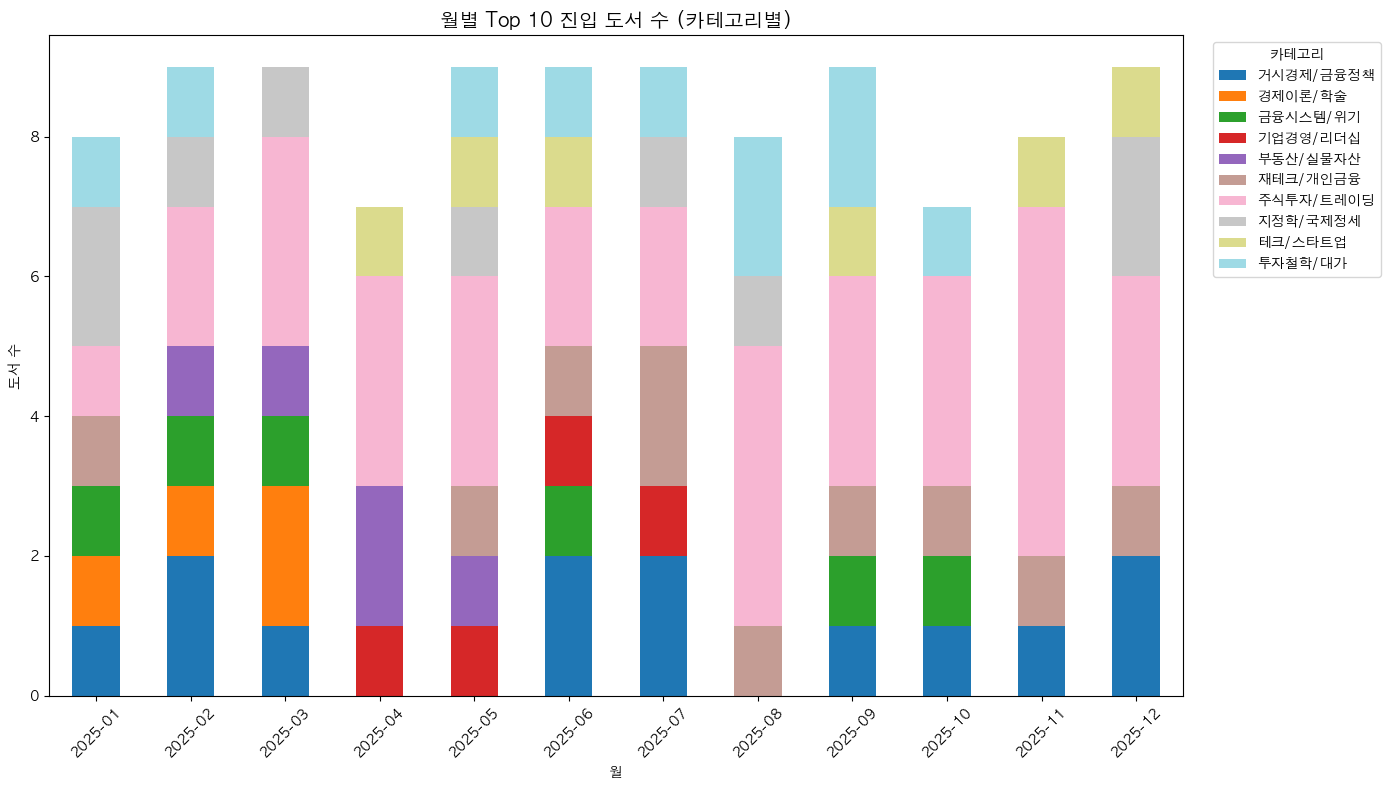

In [13]:
# 카테고리별 Top 10 진입 도서 수
df_top10 = df[df['rank'] <= 10]
top10_monthly = df_top10.groupby(['month', 'category_1']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 8))
top10_monthly.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
ax.set_title('월별 Top 10 진입 도서 수 (카테고리별)', fontsize=14)
ax.set_xlabel('월')
ax.set_ylabel('도서 수')
ax.legend(title='카테고리', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. 히트맵: 월별 카테고리 분포

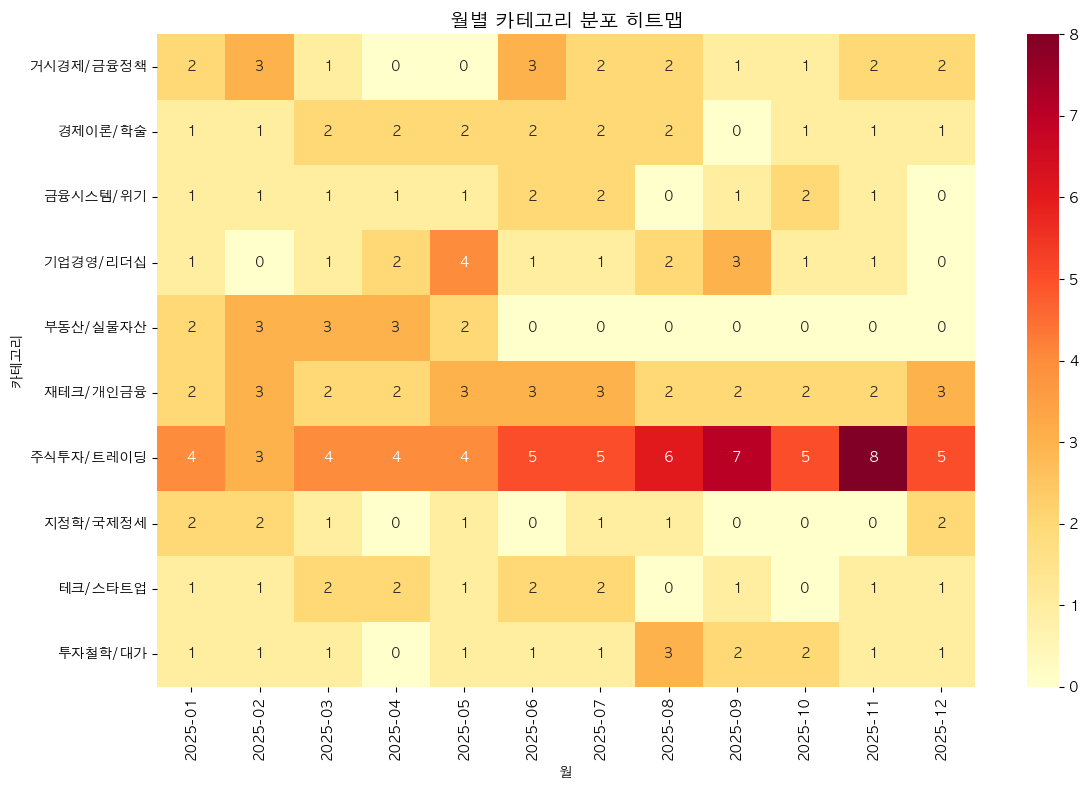

In [14]:
# 히트맵
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(monthly_cat.T, annot=True, fmt='d', cmap='YlOrRd', ax=ax)
ax.set_title('월별 카테고리 분포 히트맵', fontsize=14)
ax.set_xlabel('월')
ax.set_ylabel('카테고리')
plt.tight_layout()
plt.show()

## 6. 주요 인사이트 요약

In [15]:
# 각 월에서 가장 많은 카테고리
print("월별 최다 카테고리:")
for month in monthly_cat.index:
    top_cat = monthly_cat.loc[month].idxmax()
    count = monthly_cat.loc[month].max()
    print(f"  {month}: {top_cat} ({count}권)")

월별 최다 카테고리:
  2025-01: 주식투자/트레이딩 (4권)
  2025-02: 거시경제/금융정책 (3권)
  2025-03: 주식투자/트레이딩 (4권)
  2025-04: 주식투자/트레이딩 (4권)
  2025-05: 기업경영/리더십 (4권)
  2025-06: 주식투자/트레이딩 (5권)
  2025-07: 주식투자/트레이딩 (5권)
  2025-08: 주식투자/트레이딩 (6권)
  2025-09: 주식투자/트레이딩 (7권)
  2025-10: 주식투자/트레이딩 (5권)
  2025-11: 주식투자/트레이딩 (8권)
  2025-12: 주식투자/트레이딩 (5권)


In [16]:
# 카테고리별 변동성 (표준편차)
print("\n카테고리별 월간 변동성 (표준편차):")
volatility = monthly_cat.std().sort_values(ascending=False)
print(volatility)


카테고리별 월간 변동성 (표준편차):
category_1
주식투자/트레이딩    1.414214
부동산/실물자산     1.378954
기업경영/리더십     1.164500
거시경제/금융정책    0.996205
지정학/국제정세     0.834847
투자철학/대가      0.753778
테크/스타트업      0.717741
금융시스템/위기     0.668558
경제이론/학술      0.668558
재테크/개인금융     0.514929
dtype: float64


# 베스트셀러 EDA
2025년 월별 카테고리 분포 및 순위 변동 분석

1. 주식투자/트레이딩 - 꾸준하게 베스트셀러에 등장, 특히 하반기 증가폭


  │ 기간 │ 전체 │ Top 10 │

  │ 1월  │ 4권  │ 1권    │ 

  │ 8월  │ 6권  │ 4권    │

  │ 11월 │ 8권  │ 5권    │

  → 하반기로 갈수록 주식 도서가 베스트셀러 과반수 이상. 2025년 코스피 상승장과 연관?

  ---
  2. 부동산/실물자산 - 6월 이후 완전 소멸

  - 1~5월: 매달 1~3권씩 존재
  - 6월 이후: 0권

  → 부동산 시장 침체/금리 이슈 반영 가능성

  ---
  3. 지정학/국제정세 - 특정 시점에만 등장

  - 1~3월: 있음 (세계대전망 등)
  - 4~6월: 없음
  - 7~8월: "새로운 질서" 등장
  - 12월: 다시 등장 ("피지컬 AI 패권 전쟁", "2026 세계대전망")

  → 트럼프 관련 이슈, 연말 전망서 시즌과 연관

  ---
  4. 투자철학/대가 - 주식 열풍 따라 상승

  - 상반기 Top 10: 0~1권
  - 8~9월 Top 10: 2권씩

  → 주식 관심 증가 → "제대로 배우자" 수요?

  ---
   결론: 부동산 소멸 시점, 주식 급증 시점이 뉴스 트렌드와 얼마나 일치하는지 확인

